# Explanation

**Convolution neural networks** (CNNs) introduce one of the first succesful forms of inductive bias to deep learning, enabling neural networks to achieve state-of-the-art results in image classification.

Prior to CNNs, most image classification strategies involve manual feature engineering. Instead, the CNN introduces the ability for neural networks to configure their own _feature maps_, enabling backpropagation with stochastic gradient descent to be applied to image classifcation.

In image recognition tasks, individual pixels are subject to a lot of noise and complexity - individual pixels can be shifted in many directions, and pixel values can be slightly changed while the overall image remains the same.

The inductive bias of CNNs enables the network to ignore these details and extract an understanding of images based on higher-level, more invariant features.

### Intuition

The CNN has 3 key architectural additions on top of the standard feed-forward network that allow it to function effectively.

First, it introduces layers of _feature maps_ that each detect specific features on an image via individual neuron based computations on small sub-sections of the image (known as _kernels_). In this sence, each feature map has a corresponding _receptive field_ much smaller than the size of the image itself.

Additionally, the same feature maps act as _shared weights_ - the same feature maps applied at every position in the image. This decreases the total number of trainable parameters in the network, and allows the network to detect the features regardless of their position in the image.

Finally, the CNN uses _downsampling_ to average the results of feature detection across nearby areas in the image, effectively reducing the total complexity of the image before passing it to feed-forward layers. This has the effect of extracting high-level features from the image and removing noise, making it easier for the feed-forward network to accomplish classification.

In my notes below, I cover the original paper that introduced the CNN architecture, as well as the paper that introduced the LeNet CNN that achieved competitive results on the MNIST image classification task.


# My Notes

### 📜 [Back-propagation Applied to Handwritten Zip Code Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf)

> The ability of learning networks to generalize can be greatly enhanced by providing constraints from the task domain.

> Previous work performed on recognizing simple digit images showed that good generalization on complex tasks can be obtained by designing a network architecture that contains a certain amount of a priori knowledge about the task.

Adding priors and inductive bias is how to design architectures to make them better for specific tasks.

> The basic design principle is to reduce the number of free parameters in the network as much as possible without overly reducing its computational power.

> Application of this principle increases the probability of correct generalization because it results in a specialized network architecture that has a reduced entropy, and a reduced Vapnik-Chervonenkis dimensionality.

Reducing parameters (and providing similar computation power through architecture) makes the model more generalized and prevents it from overfitting to noise.

The images are cut into 16x16 images of numbers, with varying grayscale pixel values form -1 to 1.

### Network Design

**1. Input and Output**

> All the connections in the network are adaptive, although heavily constrained, and are trained using back-propagation.

Unlike previous implementations, no layers (including feature layers) are manual. They all are optimized via back-propagation.

Here is an early intuition that manually picking features is almost always worse than letting compute optimize the parameters for us.

> The input of the network is a 16 by 16 normalized image. The output is composed of 10 units (one per class) and uses place coding.

We see that the output is to predict which number has been detected.

**2. Feature Maps and Weight Sharing**

> Classical work in visual pattern recognition has demonstrated the advantage of extracting local features and combining them to form higher order features.

> Such knowledge can be easily built into the network by forcing the hidden units to combine only local sources of information.

We can build a feature detection system into the neural network.

> Distinctive features of an object can appear at various locations on the input image. Therefore it seems judicious to have a set of feature detectors that can detect a particular instance of a feature anywhere on the input plane.

> Since the _precise_ location of a feature is not relevant to the classification, we can afford to lose some position information in the process. Nevertheless, _approximate_ position information must be preserved, to allow the next levels to detect higher order, more complex features.

We want a sufficient level of invariance. Features a few pixels a part should be treated similarly, but we still want to distinguish between a specific feature in the top-left vs. bottom-right, especially to be able to combine smaller features into larger ones.

So, we want to create invariance across small changes, but preserve information about large differences - effectively compressing the starting image down to only useful information.

> The detection of a particular feature at any location on the input can be easily done using the “weight sharing” technique.

> Weight sharing not only greatly reduces the number of free parameters in the network but also can express information about the geometry and topology of the task.

We use weight sharing to allow individual **kernels** to be created by the neural network that can recognize specific features across the entire network. These kernels are “shared” across all locations in the input.

> In our case, the first hidden layer is composed of several planes that we call _feature maps_. All units in a plane share the same set of weights, thereby detecting the same feature at different locations.

Feature maps use the same set of weights and multiply them by different input values from different locations to extract the same feature across the image.

> Since the exact position of the feature is not important, the feature maps need not have as many units as the input.

**3. Network Architecture**

![Screenshot 2024-05-09 at 12.49.39 PM.png](../../images/Screenshot_2024-05-09_at_12.49.39_PM.png)

The network has three hidden layers H1, H2, and H3.

> Connections entering H1 and H2 are local and are heavily constrained.

H1 has 12 groups of 64 units arranged as 12 independent 8x8 feature maps. Each unit in a feature map has a 5x5 pixel input from the input plane.

> For units in layer H1 that are one unit apart, their receptive fields (in the input layer) are two pixels apart. Thus, the input image is _undersampled_ and some position information is eliminated.

Units of the same type of feature share weights across the image, whereas units across different features obviously don’t. Also, units don’t share their biases (even within a feature)

### Results

> Some kernels synthesized by the network can be interpreted as feature detectors remarkably similar to those found to exist in biological vision systems and/or designed into previous artificial character recognizers, such as spatial derivative estimators or off-center/on-surround type feature detectors.

Features that the network automatically converges to detecting match some feature times similar to how the brain operates or that were previously designed by humans.

> The first several stages of processing in our previous system involved convolutions in which the coefficients had been laboriously hand designed.

> In the present system, the first two layers of the network are constrained to be convolutional, but the system automatically learns the coefficients that make up the kernels.

> This “constrained back-propagation” is the key to success of the present system: it not only builds in shift-invariance, but vastly reduces the entropy, the Vapnik-Cervonenkis dimensionality, and the number of free parameters, thereby proportionately reducing the amount of training data required to achieve a given level of generalization performance.

Adding these constraints/priors into the network architecture significantly reduces the computational complexity of the problem, increases generalization, and completely eliminates the need to have humans laboriously craft individual features (and performs better).

### Conclusion

> We have successfully applied back-propagation learning to a large, real-world task.

> This work points out the necessity of having flexible “network design” software tools that ease the design of complex, specialized network architectures.


## 📜 [Gradient Based Learning Applied to Document Recognition](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf)


> This paper reviews various methods applied to handwritten character recognition and compares them on a standard handwritten digit recognition task Convolutional Neural Networks that are specifically designed to deal with the variability of 2D shapes are shown to outperform all other technique.
>

**1. Introduction**

> The main message of this paper is that better pattern recognition systems can be built by relying more on automatic learning and less on hand-designed heuristics.
>

This is the fundamental message of deep learning. This paper was written at a time early enough where it wasn’t yet clear that this was obviously the best solution. Much of the introductory sections of this paper serve as a good review of the principles of deep learning.

> Using character recognition as a case study, we show that handcrafted feature extraction can be advantageously replaced by carefully designed learning machines that operate directly on pixel images.
>

In contrast with the manual feature engineering approaches taken previous to this paper, they show that allowing a deep neural network to design it’s own features beats most prior approaches. After, the MNIST digit recognition task and with the release of more complex datasets like ImageNet, people again turned to more traditional feature extractive approaches to solving these problems until AlexNet once again proved that deep learning was superior.

> Historically the need for appropriate feature extractors was due to the fact that the learning techniques used by the classifiers were limited to low dimensional spaces with easily separable classes. A combination of three factors have changed this vision over the last decade.
>

> First the availability of low cost machines with fast arithmetic units allows us to rely more on brute force numerical methods than on algorithmic refinements.
>

The improvement of computation has made deep learning more viable. This trend continues - as Moore’s Law continues, compute gets better, increasing the capacity for machine intelligence.

> Second the availability of large databases for problems with a large market and wide interest such as handwriting recognition has enabled designers to rely more on real data and less on handcrafted feature extraction to build recognition systems.
>

Large labeled datasets enable better data to train deep learning models on.

> The third and very important factor is the availability of powerful machine learning techniques that can handle high-dimensional inputs and can generate intricate decision functions when fed with these large data sets.
>

Finally, good deep learning approaches are necessary to take advantage of the compute and data available in order to use them to build intelligent models. This is an indication of the constraints discussed in the README.

> While more automatic learning is beneficial, no learning technique can succeed without a minimal amount of prior knowledge about the task. In the case of multilayer neural networks, a good way to incorporate knowledge is to tailor its architecture to the task.
>

Here, they discuss the importance of priors for a task - the goal isn’t to eliminate priors, but to provide the right priors for the model to adapt to the task, and let the model learn how to configure it’s parameters most optimally.

**2. Learning from Data**

> Much theoretical and experimental work has shown that the gap between the expected error rate on the test set $E_{\textrm{test}}$ and the error rate on the training set $E_{\textrm{train}}$ decreases with the number of training samples approximately as
>

$$
E_{\textrm{test}} - E_{\textrm{train}} = k(h/P)^\alpha
$$

> where $P$ is the number of training samples [and] $h$ is a measure of “effective capacity or complexity of the machine.
>

The quality of training improves with the amount of data in the dataset, and the total representational capacity of the model.

**3. Gradient-Based Learning**

> The simplest minimization procedure […] is the gradient descent algorithm where $W$ is iteratively adjusted as follows:
>

$$
W_k = W_{k-1} - \epsilon\frac{\partial E(W)}{\partial W}
$$

> A popular minimization procedure is the stochastic gradient algorithm also called the online update It consists in updating the parameter vector using a noisy or approximated version of the average gradient.
>

$$
W_k = W_{k-1} - \epsilon \frac{\partial E^{p_k}(W)}{\partial W}
$$

**4. Gradient Back-Propagation**

> The surprising usefulness of such simple gradient descent techniques for complex machine learning tasks was not widely realized until the following three events occurred.
>

> The first event was the realization that despite early warnings to the contrary
 the presence of local minima in the loss function does not seem to be a major problem in practice.
>

Early on, it seemed that falling into local minima was going to be a large issue that would make backpropagation ineffective. In practice, this appears not to be the case - why is this? Maybe there’s something about the manifolds of parameters spaces in deep learning that happens to be inherently convex all around generally.

> The second event was the popularization by Rumelhart, Hinton, and Williams and others of a simple and efficient procedure the backpropagation algorithm to compute the gradient in a nonlinear system composed of several layers of processing.
>

The backpropagation algorithm enabled gradients to flow throughout the network, rather than just immediately back from the loss to one layer. This allowed for the creation of more complex networks.

> The third event was the demonstration that the backpropagation procedure applied to multilayer neural networks with sigmoidal units can solve complicated learning tasks.
>

> The basic idea of backpropagation is that gradients can be computed efficiently by propagation from the output to the input.
>

### Convolutional Neural Networks

> Convolutional Networks combine three architectural ideas to ensure some degree of shift scale and distortion invariance: *local receptive fields,* *shared weights,* (or weight replication) and spatial or temporal *sub-sampling*.
>

In this way, the principles of CNNs heavily resemble the design of the visual system in the brain (by design).

> With local receptive fields, neurons can extract elementary visual features such as oriented edges endpoints corners […]. These features are then combined by the subsequent layers in order to detect higher-order features.
>

Local receptive fields are meant to detect smaller features with relative shift invariance across an image. Then, they can be tuned to determine what features are useful to detect.

> Units in a layer are organized in planes within which all the units share the same set of weights. The set of outputs of the units in such a plane is called a feature map. Units in a feature map are all constrained to perform the same operation on different parts of the image.
>

This aspect of feature maps is what actually enables shift invariance.

> The receptive fields of contiguous units in a feature map are centered on correspondingly contiguous units in the previous layer. Therefore receptive fields of neighboring units overlap.
>

> The kernel of the convolution is the set of connection weights used by the units in the feature map.
>

> An interesting property of convolutional layers is that if the input image is shifted the feature map output will be shifted by the same amount but will be left unchanged otherwise. This property is at the basis of the robustness of convolutional networks to shifts and distortions of the input.
>

Feature maps make the CNN robust against common transformations in equivalent images, picking out important representations and filtering out a layer of unimportant noise.

> A simple way to reduce the precision with which the position of distinctive features are encoded in a feature map is to reduce the spatial resolution of the feature map This can be achieved with a so called subsampling layers which performs a local averaging and a subsampling reducing the resolution of the feature map and reducing the sensitivity of the output to shifts and distortions.
>

Subsampling averages the effects of multiple feature maps to prevent shifts in features from affecting the overall predictions - nearby features should be treated as equivalent.

> Each unit computes the average of its four inputs multiplies it by a trainable coefficient adds a trainable bias and passes the result through a sigmoid function Contiguous units have non-overlapping contiguous receptive fields. Consequently, a subsampling layer feature map has half the number of rows and columns as the feature maps in the previous layer.
>

> Since all the weights are learned with backpropagation convolutional networks can be seen as synthesizing their own feature extractor. The weight sharing technique has the interesting side effect of reducing the number of free parameters thereby reducing the capacity of the machine and reducing the gap between test error and training error.
>

Because the same feature maps are applied at every position in the image, the number of trainable parameters significantly decreases.

# Implementation

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 10
batch_size = 100
learning_rate = 0.01

In [5]:
from torchvision import datasets, transforms

# MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))])

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transform, download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

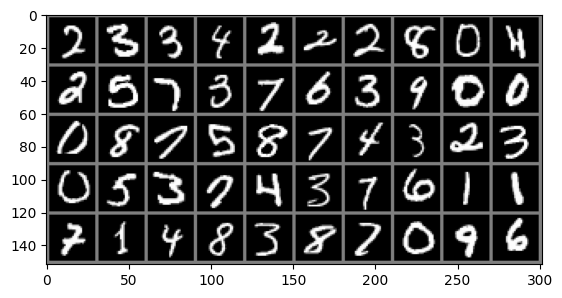

In [17]:
from torchvision.utils import make_grid

def show_images(img):
    img = img / 2 + 0.5
    img_numpy = img.numpy()
    plt.imshow(np.transpose(img_numpy, (1, 2, 0)))
    plt.show()

images, _ = next(iter(train_loader))
show_images(make_grid(images, nrow=10))

In [26]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.convolutions = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kenrel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.convolutions(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output

In [ ]:
model = CNN()
model.to(device)

In [28]:
cross_entropy = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [29]:
train_losses = []
test_losses = []

for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        x = Variable(images)
        y = Variable(labels)
        y_pred = model(x)
        loss = cross_entropy(y_pred, y)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            loss = cross_entropy(output, labels)
            test_loss += loss.item()

    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader)
    test_loss = test_loss/len(test_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f"epoch {epoch+1}: train loss {train_loss}, test loss {test_loss}")


epoch 1: train loss 0.16827901521047656, test loss 0.07557458923845843
epoch 2: train loss 0.09774755993159488, test loss 0.08402776714072388
epoch 3: train loss 0.08987130721538658, test loss 0.08886335438426612
epoch 4: train loss 0.08929878162385042, test loss 0.0757668037066469
epoch 5: train loss 0.08194941192634966, test loss 0.10794557399851329
epoch 6: train loss 0.07988293216253926, test loss 0.08395929212271767
epoch 7: train loss 0.07506571989260313, test loss 0.0926054966307629
epoch 8: train loss 0.07935306636321911, test loss 0.061578892641724677
epoch 9: train loss 0.07377699275360404, test loss 0.08543371689329433
epoch 10: train loss 0.07159478552118041, test loss 0.09494478983704539


Now that we've trained the CNN, we can look at the graph of losses over time and check the accuracy on the testing set. The test loss starts out very low initially (the network appears to train very quickly). Then, the corresponding continual decrease of the training loss but increase in test loss is clear overfitting to the training set.

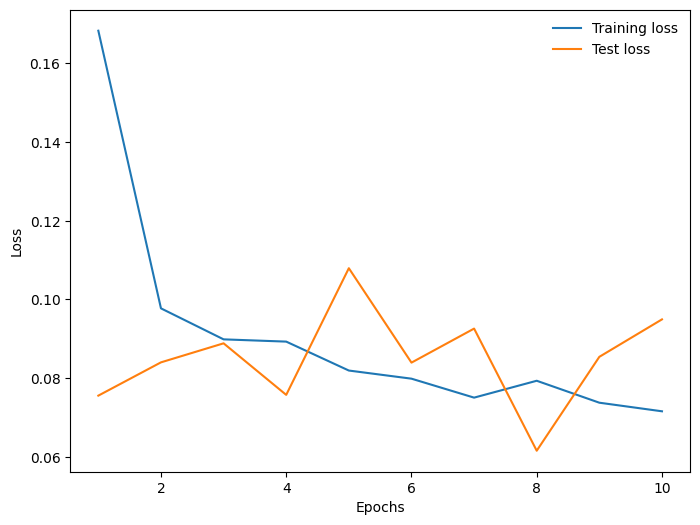

In [30]:
x_values = list(range(1, epochs+1))
plt.figure(figsize=(8., 6.))
plt.plot(x_values, train_losses, label='Training loss');
plt.plot(x_values, test_losses, label='Test loss');
plt.xlabel("Epochs");
plt.ylabel("Loss");
plt.legend(frameon=False);

In [31]:
model.eval()
with torch.no_grad():
    correct, total = 0.0, 0.0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, y_pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (y_pred == labels).sum().item()

print('Accuracy: {}%'.format(100 * correct / total))

Accuracy: 97.47%
